In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv('marketingData.csv')

In [43]:
#qualitative data wrangling
#Qualitative coloumns to change: Education, Marital_Status 
#IDK about lots of the options for the qualitative options, so there may be better ways to number it
education_mapping = {'Graduation': 1, 'PhD': 2, 'Master': 3, 'Basic': 4, '2n Cycle': 5}
marital_mapping = {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 6,'Absurd': 7, 'YOLO': 8}
df['Education'] = df['Education'].map(education_mapping)
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

#Qualitative coloumns to throw away: Dt_Customer cuase idk how to turn it into quantatative
df.drop(columns=['Dt_Customer'], inplace=True)

In [44]:
#quantative data wrangling
#Not important columns:
#ID as it syas nothing about the entry
df.drop(columns=['ID'], inplace=True)
#Z_CostContact and Z_Revenue as they are all the same
df.drop(columns=['Z_CostContact'], inplace=True)
df.drop(columns=['Z_Revenue'], inplace=True)

In [45]:
#null data wrangling
#income
#just income, replace it with mean
df_filled = df.fillna(df.mean())

In [46]:
#scale the data:
scaler = StandardScaler()
scaler.fit(df)
scaled_arr = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_arr)

In [47]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2240 non-null   float64
 1   1       2240 non-null   float64
 2   2       2240 non-null   float64
 3   3       2216 non-null   float64
 4   4       2240 non-null   float64
 5   5       2240 non-null   float64
 6   6       2240 non-null   float64
 7   7       2240 non-null   float64
 8   8       2240 non-null   float64
 9   9       2240 non-null   float64
 10  10      2240 non-null   float64
 11  11      2240 non-null   float64
 12  12      2240 non-null   float64
 13  13      2240 non-null   float64
 14  14      2240 non-null   float64
 15  15      2240 non-null   float64
 16  16      2240 non-null   float64
 17  17      2240 non-null   float64
 18  18      2240 non-null   float64
 19  19      2240 non-null   float64
 20  20      2240 non-null   float64
 21  21      2240 non-null   float64
 22  

In [48]:
scaled_df = scaled_df.fillna(scaled_df.mean())

In [49]:
inertias = []
for n in range(2, 40):
    kmeans = KMeans(n_clusters=n).fit(scaled_df)
    inertias.append(kmeans.inertia_)

<AxesSubplot:>

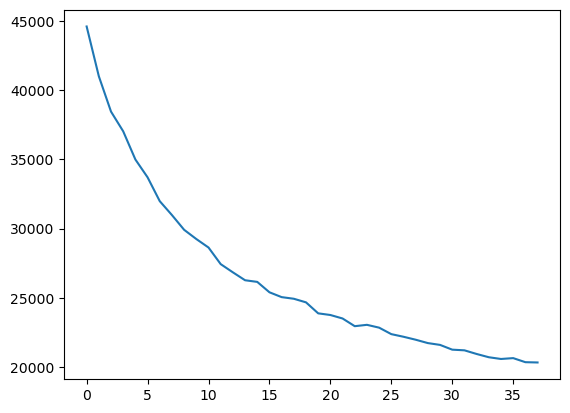

In [50]:
sns.lineplot(data=inertias)

In [51]:
kmeans = KMeans(n_clusters=11).fit(scaled_df)

In [52]:
predictions = kmeans.predict(scaled_df)
print(predictions)

[ 2  8 10 ...  0 10  8]


In [60]:
def find_most_common(arr):
    frequency = {}
    most_common_value = None
    max_frequency = 0
    
    for num in arr:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1
        
        if frequency[num] > max_frequency:
            max_frequency = frequency[num]
            most_common_value = num
            
    return most_common_value

In [61]:
find_most_common(predictions)

8

In [53]:
centers = kmeans.cluster_centers_

In [68]:
unscaled_centers = scaler.inverse_transform(centers)
python_array = unscaled_centers.tolist()

In [74]:
python_array[8]

[1962.4105011933175,
 1.7255369928400954,
 2.558472553699284,
 43062.822814979794,
 0.6229116945107398,
 0.9546539379474939,
 49.21957040572792,
 65.3341288782816,
 4.0787589498806724,
 24.24105011933176,
 6.0596658711217195,
 4.097852028639629,
 13.515513126491637,
 2.1408114558472553,
 2.2386634844868736,
 0.6491646778042948,
 3.5775656324582337,
 5.689737470167064,
 -8.326672684688674e-17,
 5.551115123125783e-17,
 1.3877787807814457e-17,
 -4.163336342344337e-17,
 -3.469446951953614e-18,
 -3.469446951953614e-18,
 0.038186157517899846]

In [78]:
keys = df_filled.columns.tolist()
for i in range(len(python_array[8])):
    print(keys[i], " | ", python_array[8][i])

Year_Birth  |  1962.4105011933175
Education  |  1.7255369928400954
Marital_Status  |  2.558472553699284
Income  |  43062.822814979794
Kidhome  |  0.6229116945107398
Teenhome  |  0.9546539379474939
Recency  |  49.21957040572792
MntWines  |  65.3341288782816
MntFruits  |  4.0787589498806724
MntMeatProducts  |  24.24105011933176
MntFishProducts  |  6.0596658711217195
MntSweetProducts  |  4.097852028639629
MntGoldProds  |  13.515513126491637
NumDealsPurchases  |  2.1408114558472553
NumWebPurchases  |  2.2386634844868736
NumCatalogPurchases  |  0.6491646778042948
NumStorePurchases  |  3.5775656324582337
NumWebVisitsMonth  |  5.689737470167064
AcceptedCmp3  |  -8.326672684688674e-17
AcceptedCmp4  |  5.551115123125783e-17
AcceptedCmp5  |  1.3877787807814457e-17
AcceptedCmp1  |  -4.163336342344337e-17
AcceptedCmp2  |  -3.469446951953614e-18
Complain  |  -3.469446951953614e-18
Response  |  0.038186157517899846


In [ ]:
#Group #8, the largest group, is 


#Year_Birth  |  1962.4105011933175
# Education  |  1.7255369928400954
# Marital_Status  |  2.558472553699284
# Income  |  43062.822814979794
# Kidhome  |  0.6229116945107398
# Teenhome  |  0.9546539379474939
# Recency  |  49.21957040572792
# MntWines  |  65.3341288782816
# MntFruits  |  4.0787589498806724
# MntMeatProducts  |  24.24105011933176
# MntFishProducts  |  6.0596658711217195
# MntSweetProducts  |  4.097852028639629
# MntGoldProds  |  13.515513126491637
# NumDealsPurchases  |  2.1408114558472553
# NumWebPurchases  |  2.2386634844868736
# NumCatalogPurchases  |  0.6491646778042948
# NumStorePurchases  |  3.5775656324582337
# NumWebVisitsMonth  |  5.689737470167064
# AcceptedCmp3  |  -8.326672684688674e-17
# AcceptedCmp4  |  5.551115123125783e-17
# AcceptedCmp5  |  1.3877787807814457e-17
# AcceptedCmp1  |  -4.163336342344337e-17
# AcceptedCmp2  |  -3.469446951953614e-18
# Complain  |  -3.469446951953614e-18
# Response  |  0.038186157517899846

In [75]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   float64
 1   Education            2240 non-null   float64
 2   Marital_Status       2240 non-null   float64
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   float64
 5   Teenhome             2240 non-null   float64
 6   Recency              2240 non-null   float64
 7   MntWines             2240 non-null   float64
 8   MntFruits            2240 non-null   float64
 9   MntMeatProducts      2240 non-null   float64
 10  MntFishProducts      2240 non-null   float64
 11  MntSweetProducts     2240 non-null   float64
 12  MntGoldProds         2240 non-null   float64
 13  NumDealsPurchases    2240 non-null   float64
 14  NumWebPurchases      2240 non-null   float64
 15  NumCatalogPurchases  2240 non-null   f